In [8]:
import pickle
with open('/root/BehaviorStudio/behavior_studio/20201030-144041_lap_checkpoints.pkl', 'rb') as f:
    data = pickle.load(f)

    

for point in data:
    print(point)
    
print()
print(data['world'])
print(data['brain_path'])
print(data['robot_type'])
for point in data['checkpoints']:
    print(point)



world
brain_path
robot_type
checkpoints

f1_1_simplecircuit.launch
brain_f1_opencv.py
f1
{'x': 53.46199817232156, 'y': -10.734081126673486, 'z': 0.0, 'h': 1, 'yaw': -1.5700029709849637, 'pitch': 0.010361575935596336, 'roll': 7.570666380649914e-05, 'quaternion': [0.7073775867462824, 0.0036886770575902507, 0.0036380514279133196, -0.706816884357171], 'timestamp': 31.82}
{'x': 53.465698904511406, 'y': -11.903658001071316, 'z': 0.0, 'h': 1, 'yaw': -1.590804522092724, 'pitch': 0.010346638620069527, 'roll': 7.85920437064878e-05, 'quaternion': [0.6999880370734083, 0.003721991651925317, 0.0035932319943517855, -0.7141358298083739], 'timestamp': 32.18}
{'x': 53.43271584083524, 'y': -13.277487468365479, 'z': 0.0, 'h': 1, 'yaw': -1.5125487791679824, 'pitch': 0.010345386816206436, 'roll': 7.570242044637501e-05, 'quaternion': [0.72738776104053, 0.0035771027650067914, 0.0037366143632655397, -0.6862071750844302], 'timestamp': 32.639}
{'x': 53.51732354733193, 'y': -14.518977313868698, 'z': 0.0, 'h': 1, 

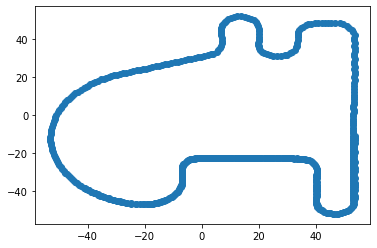

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_points = []
y_points = []

for point in data['checkpoints']:
    # print(point)
    x_points.append(point['x'])
    y_points.append(point['y'])


plt.scatter(x_points, y_points)
plt.show()

In [30]:
def finish_line(point_1, point_2):
    current_point = np.array([point_1['x'], point_1['y']])
    start_point = np.array([point_2['x'], point_2['y']])

    dist = (start_point - current_point) ** 2
    dist = np.sum(dist, axis=0)
    dist = np.sqrt(dist)
    if dist < 0.5:
        return True
    return False

def circuit_diameter(data):
    previous_point = []
    diameter = 0
    for i, point in enumerate(data['checkpoints']):
        current_point = np.array([point['x'], point['y']])
        if i is not 0:
            dist = (previous_point - current_point) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            diameter += dist
            # distancia entre el punto y el anterior excepto en el primer punto que no hay. Esa distancia se suma.
        if point is lap_point:
            break
        previous_point = np.array([point['x'], point['y']])
    return diameter
        


# Find how many laps has the robot completed.
start_point = data['checkpoints'][0]

for x, point in enumerate(data['checkpoints']):
    if x is not 0 and finish_line(point, start_point) and point['timestamp'] - 10 > start_point['timestamp']:
        lap_point = point
        
seconds_start = data['checkpoints'][0]['timestamp']
seconds_end = lap_point['timestamp']
lap_seconds = seconds_end - seconds_start

# TIME TO COMPLETE LAP
print('TIME TO COMPLETE LAP -> ' + str(lap_seconds) + ' s')            
# CIRCUIT LONGITUDE
print('LONGITUDE -> ' + str(circuit_diameter(data)) + ' m')
# AVERAGE SPEED
print('SPEED -> ' + str(circuit_diameter(data)/lap_seconds) + ' m/s')
            
            


TIME TO COMPLETE LAP -> 151.983 s
LONGITUDE -> 430.43678021461255 m
SPEED -> 2.8321376747044904 m/s


In [33]:
'''
* Get velocity between each checkpoint
* Plot the velocities with colors.
'''

def get_speed_points(data):
    previous_point = []
    speed_points = []
    for i, point in enumerate(data['checkpoints']):
        current_point = np.array([point['x'], point['y']])
        seconds_current = point['timestamp']
        if i is not 0:
            # get distance between points
            dist = (previous_point[1] - current_point[1]) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            seconds_difference = seconds_current - seconds_previous
            speed_points.append(dist/seconds_difference)
        if point is lap_point:
            break
        previous_point = np.array([point['x'], point['y']])
        seconds_previous = seconds_current
    return speed_points

def get_average_speed(speed_points):
    speed = 0
    for point in speed_points:
        speed += point
    return speed / len(speed_points)


speed_points = get_speed_points(data)
#print(speed_points)
print(get_average_speed(speed_points))
print()
print()

for point in speed_points:
    print(point)

1.9078272597049477


3.248824651105088
2.993092521338025
3.4775625924459983
3.213100243678932
3.0644436681915725
3.073942324720788
3.6254371585556244
3.0493087765997675
2.817897671810599
3.5039089488938004
3.156231595375311
3.0600938872553947
2.892209242445572
3.179545546723316
3.5203580101695886
2.998617546859696
2.9915844000486587
3.1173771010169533
2.96748729883118
2.9408312995120127
2.9251818447707367
2.944705676316467
3.2141579925990396
2.9273925383074513
2.9234832047511796
2.9958260492949136
3.05608347851833
2.9517638786788596
2.9281736543897843
3.0207495505568565
3.0774313465851706
2.1345989602051545
2.3251986282306634
1.4373832217294757
1.3555311411307545
0.44893791314060133
0.25157785982079084
0.8460997175707693
0.7850613013139865
1.5303115223502537
1.8642924524289866
2.051559783083597
2.4859702411136864
2.8698212868138833
3.277097571613839
2.8847672217676337
3.132373493388189
3.169817666649424
2.9562474692490155
2.771336255699622
2.995398636698951
2.559951143706788
2.80510981